In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [2]:
NUM_FOLDS = 5
NUM_USERS = 14

## Existing Sims Results

In [3]:
cv_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\PythonVersion\PythonSimsRevamp\results\WithGradNorm_SR3"

#cross_nofl_dir = "08-27_17-50_NOFL"
cross_fedavg_dir = "08-27_19-46_FEDAVG"
cross_pfa_dir = "08-27_19-53_PFAFO_GDLS"
#intra_nofl_dir = "08-27_19-57_NOFL"
intra_fedavg_dir = "08-27_19-59_FEDAVG"
intra_pfa_dir = "08-27_20-00_PFAFO_GDLS"

#nofl_filename = "FULLSCIPYMIN_NOFL_CrossValResults.h5" 
fedavg_filename = "GDLS_FEDAVG_CrossValResults.h5"
pfa_filename = "GDLS_PFAFO_GDLS_CrossValResults.h5"

#cross_nofl_h5_path = os.path.join(cv_results_path, cross_nofl_dir, nofl_filename)
cross_fedavg_h5_path = os.path.join(cv_results_path, cross_fedavg_dir, fedavg_filename)
cross_pfa_h5_path = os.path.join(cv_results_path, cross_pfa_dir, pfa_filename)
#intra_nofl_h5_path = os.path.join(cv_results_path, intra_nofl_dir, nofl_filename)
intra_fedavg_h5_path = os.path.join(cv_results_path, intra_fedavg_dir, fedavg_filename)
intra_pfa_h5_path = os.path.join(cv_results_path, intra_pfa_dir, pfa_filename)

paths_lst = [cross_fedavg_h5_path, cross_pfa_h5_path, intra_fedavg_h5_path, intra_pfa_h5_path]

cross_fedavg_global_log = []
cross_pfa_global_log = []
intra_fedavg_global_log = []
intra_pfa_global_log = []

global_log_lst = [cross_fedavg_global_log, cross_pfa_global_log, intra_fedavg_global_log, intra_pfa_global_log]


In [4]:
for idx, path in enumerate(paths_lst):
    print(idx)
    with h5py.File(path, 'r') as f:
        a_group_key = list(f.keys())#[0]
        #print(a_group_key)
        for key in a_group_key:
            if "global" in key:
                print(key)
                global_log_lst[idx].append(f[key][()])


0
1
2
3


> So existing sims files don't save the global model performance... ought to switch to using server.save_results()

In [16]:
cv_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\PythonVersion\PythonSimsRevamp\results\WithGlobalLogs_SR4"


## PFA Run Incorporating server.save_results()

In [7]:
cross_pfa_dir = "08-28_15-34_PFAFO_GDLS"
pfa_filename = "GDLS_PFAFO_GDLS_KFold" #.h5
cross_pfa_global_log = []

for fold_num in range(NUM_FOLDS):
    print(fold_num)
    path = os.path.join(cv_results_path, cross_pfa_dir, pfa_filename+str(fold_num)+".h5")
    with h5py.File(path, 'r') as f:
        a_group_key = list(f.keys())#[0]
        #print(a_group_key)
        for key in a_group_key:
            if "global" in key:
                print(key)
                cross_pfa_global_log.append(f[key][()])



0
global_test_error_log
global_train_error_log
1
global_test_error_log
global_train_error_log
2
global_test_error_log
global_train_error_log
3
global_test_error_log
global_train_error_log
4
global_test_error_log
global_train_error_log


In [8]:
path = os.path.join(cv_results_path, cross_pfa_dir, pfa_filename+str(1)+".h5")
with h5py.File(path, 'r') as f:
    a_group_key = list(f.keys())#[0]
    print(a_group_key)

['client_local_test_log', 'global_test_error_log', 'global_train_error_log', 'gradient_norm_lists_by_client', 'local_test_error_log', 'local_train_error_log']


Final Loss: 0.001992630753001865
Final Loss: 0.0019995224705322977
Final Loss: 0.0017693237519045063
Final Loss: 0.001662712357576514
Final Loss: 0.0016766155087894082


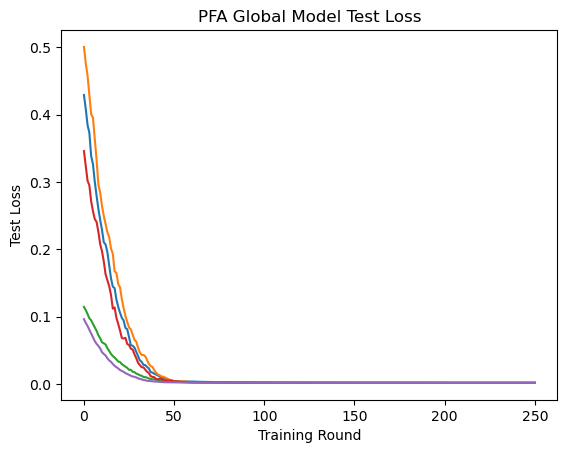

In [9]:
for idx, log in enumerate(cross_pfa_global_log):
    #print(len(log))
    if idx%2==0:
        plt.plot(range(len(log)), log)
        print(f"Final Loss: {log[-1]}")
plt.title("PFA Global Model Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.show()

Final Loss: 1.8729755876321237e-07
Final Loss: 1.747767600061238e-07
Final Loss: 1.9105359112794174e-07
Final Loss: 2.0411740116703315e-07
Final Loss: 1.923185562569304e-07


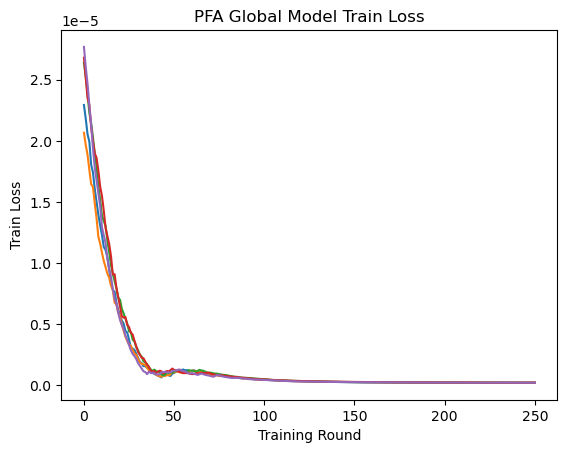

In [10]:
for idx, log in enumerate(cross_pfa_global_log):
    #print(len(log))
    if idx%2!=0:
        plt.plot(range(len(log)), log)
        print(f"Final Loss: {log[-1]}")
plt.title("PFA Global Model Train Loss")
plt.xlabel("Training Round")
plt.ylabel("Train Loss")
plt.show()

# Full Extraction
> Need to compare all results to other files, make sure everything was saved correctly. If so, can just use server.save_results() and remove the non-functionalized code in both main files

In [20]:
cross_pfa_dir = "08-28_15-34_PFAFO_GDLS"
pfa_filename = "GDLS_PFAFO_GDLS_KFold" #.h5

log_dict = dict()
for key in a_group_key:
    if key in ["_client_local_test_log", "client_local_test_log", "gradient_norm_lists_by_client"]:
        log_dict[key] = [[] for _ in range(NUM_USERS)]
    else:
        log_dict[key] = []

#a_group_key
#['_client_local_test_log', 'global_test_error_log', 'global_train_error_log', 'gradient_norm_lists_by_client', 'local_test_error_log', 'local_train_error_log']

for fold_num in range(NUM_FOLDS):
    #print(fold_num)
    path = os.path.join(cv_results_path, cross_pfa_dir, pfa_filename+str(fold_num)+".h5")
    with h5py.File(path, 'r') as f:
        a_group_key = list(f.keys())#[0]
        #print(a_group_key)
        for idx, key in enumerate(a_group_key):
            #print((fold_num, idx))
            try:
                # Assuming this is a Group object
                #print(f[key].keys())
                for cli_idx, cli_key in enumerate(f[key].keys()):
                    log_dict[key][cli_idx].append(list(f[key][cli_key]))
            except AttributeError:
                # This is a Dataset object
                log_dict[key].append(f[key][()])


In [21]:
for idx, key in enumerate(a_group_key):
    print(f"{key} in dict has len {len(log_dict[key])}")
    

client_local_test_log in dict has len 14
global_test_error_log in dict has len 5
global_train_error_log in dict has len 5
gradient_norm_lists_by_client in dict has len 14
local_test_error_log in dict has len 5
local_train_error_log in dict has len 5


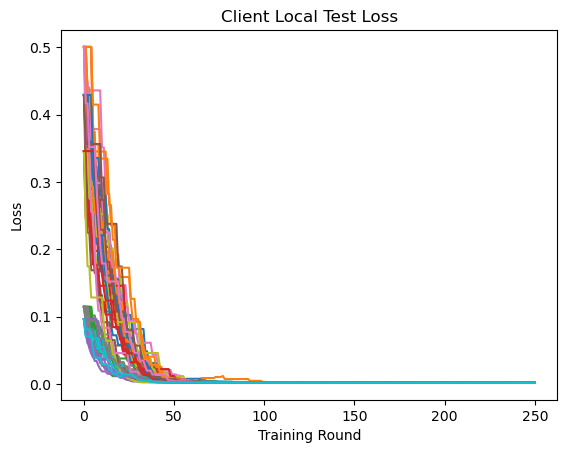

In [23]:
for fold_idx, fold_data in enumerate(log_dict['client_local_test_log']):
    for cli_idx, cli_data in enumerate(fold_data):
        #print(type(cli_data))
        #print(len(cli_data))
        plt.plot(cli_data)
plt.title("Client Local Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.show()

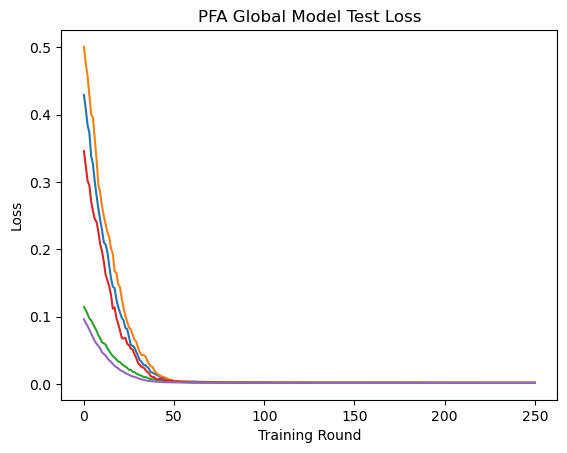

In [24]:
for fold_idx, fold_data in enumerate(log_dict['global_test_error_log']):
    plt.plot(fold_data)
plt.title("PFA Global Model Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.show()

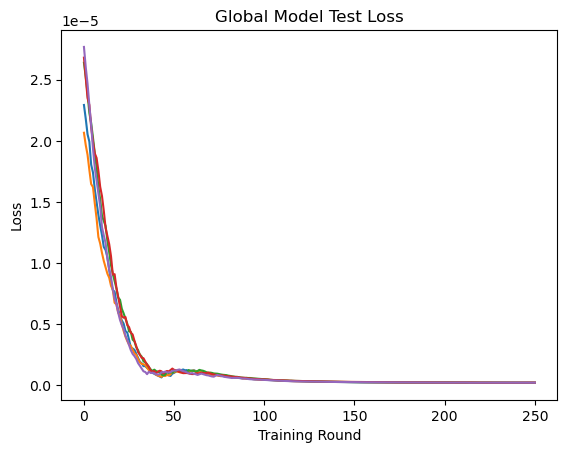

In [25]:
for fold_idx, fold_data in enumerate(log_dict['global_train_error_log']):
    plt.plot(fold_data)
plt.title("Global Model Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.show()

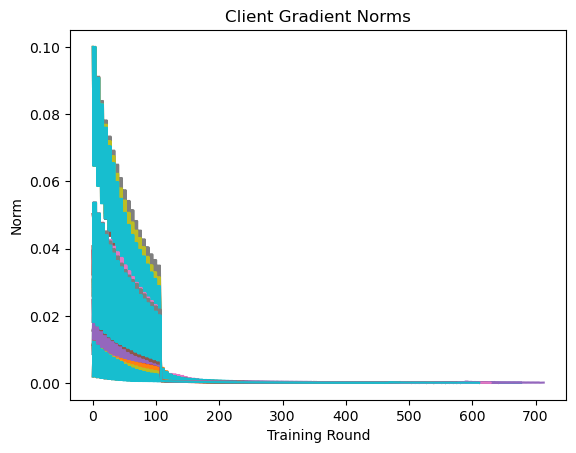

In [26]:
for fold_idx, fold_data in enumerate(log_dict['gradient_norm_lists_by_client']):
    for cli_idx, cli_data in enumerate(fold_data):
        #print(type(cli_data))
        #print(len(cli_data))
        plt.plot(cli_data)
plt.title("Client Gradient Norms")
plt.xlabel("Training Round")
plt.ylabel("Norm")
plt.show()

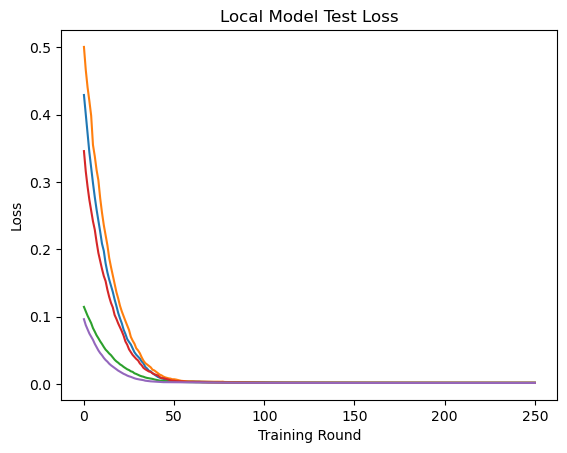

In [27]:
for fold_idx, fold_data in enumerate(log_dict['local_test_error_log']):
    plt.plot(fold_data)
plt.title("Local Model Test Loss")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.show()

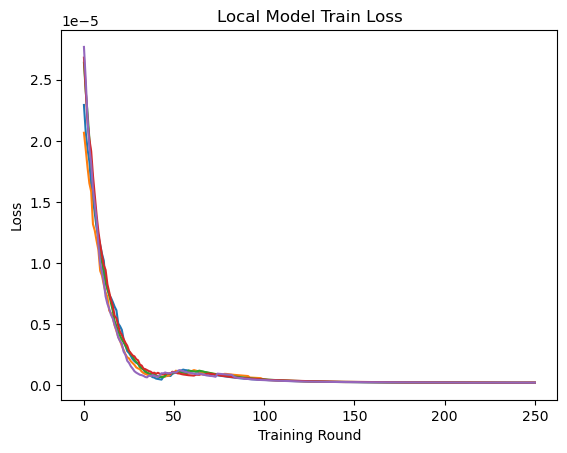

In [28]:
for fold_idx, fold_data in enumerate(log_dict['local_train_error_log']):
    plt.plot(fold_data)
plt.title("Local Model Train Loss")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.show()